# intro

## Autores

Juan Pablo Jaramillo Tobon CC 1216727112

Daniel Alejandro Higuita Usuga CC 1152706601


## Dataset

Los registros de viajes en taxi amarillo y verde incluyen campos que capturan fechas/horas de recogida y devolución, lugares de recogida y devolución, distancias de viaje, tarifas detalladas, tipos de tarifas, tipos de pago y recuentos de pasajeros informados por el conductor. Los datos utilizados en los conjuntos de datos adjuntos se recopilaron y proporcionaron a la Comisión de Taxis y Limusinas de Nueva York (TLC).

El dataset posee 19 columnas de las cuales usaremos solo 4

* tpep_pickup_datetime: fecha y hora de inicio de carrera
* pickup_longitude: longitud geoespacial de recogida de la carrera
* pickup_latitude: latitud geoespacial de recogida de la carrera
* tip_amount: propina dejada

## Objetivo

El objetivo es la creacion de un modelo que permita la prediccion de la propina dejada por los usuarios dependiendo de el lugar y la hora donde se recoge la propina

# Dependencias

In [125]:
# Carga de env variables 
# ==============================================================================
import yaml
with open('config.yaml') as f:
    env_vars = yaml.safe_load(f)

In [126]:
%pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Librerias

In [127]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np


# Almacenar en caché los resultados de funciones en el disco
# ==============================================================================
import joblib
import os


# Gestion de librerias
# ==============================================================================
from importlib import reload


# Matemáticas y estadísticas
# ==============================================================================
import math


# Preparación de datos
# ==============================================================================
from sklearn.neighbors import LocalOutlierFactor

#Separar los datos entrenamiento y prueba
from sklearn.model_selection import train_test_split


#Escalar Variables
from sklearn.preprocessing import MinMaxScaler


#Evaluación del modelo
from sklearn import metrics
#from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
#from sklearn.metrics import roc_auc_score
#from sklearn.metrics import roc_curve


#Creación de modelo
from sklearn import svm
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


#configuracion de hiperparámetros
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [128]:
from funciones import *

## Datasets

In [129]:
csv2015_1 = pd.read_csv('data/yellow_tripdata_2015-01.csv',nrows=10000)
csv2015_2 = pd.read_csv('data/yellow_tripdata_2015-02.csv',nrows=10000)
csv2015_3 = pd.read_csv('data/yellow_tripdata_2015-03.csv',nrows=10000)

df = pd.concat([csv2015_1,csv2015_2,csv2015_3],ignore_index=True)

## Preparacion de Datos

### Eliminación de Columnas innecesarias

In [130]:
df = df[["tpep_pickup_datetime","pickup_longitude","pickup_latitude","tip_amount"]]

### Minimización del Dataset

In [131]:
# if env_vars['minimize_dataset']:
#     particion = (100-0.1)/100
#     X_train, X_test, y_train, y_test = train_test_split(df['reseña'],df['clasificacion'], test_size=particion, random_state=42)
#     df = pd.concat([y_train, X_train], axis=1)
#     del X_train, X_test, y_train, y_test 

### Revisión de Duplicados

In [132]:
df.loc[df.duplicated()]

,tpep_pickup_datetime,pickup_longitude,pickup_latitude,tip_amount
3831,2015-01-17 22:40:27,-74.002357,40.739826,0.0
10067,2015-02-09 04:13:10,-74.006393,40.743942,0.0
10394,2015-02-15 17:14:11,0.000000,0.000000,0.0
10747,2015-02-03 13:03:23,-73.995377,40.717339,0.0
18035,2015-02-08 03:13:37,0.000000,0.000000,0.0
21719,2015-03-03 18:29:47,-73.985092,40.761169,0.0
22127,2015-03-07 04:08:56,-73.944832,40.783001,0.0
24430,2015-03-09 10:23:35,-73.988617,40.754028,0.0
24589,2015-03-27 10:07:25,0.000000,0.000000,0.0
24912,2015-03-01 12:38:12,0.000000,0.000000,0.0


### Eliminación de Duplicados

In [133]:
df = df.drop_duplicates()

### Información del Dataset

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29990 entries, 0 to 29999
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tpep_pickup_datetime  29990 non-null  object 
 1   pickup_longitude      29990 non-null  float64
 2   pickup_latitude       29990 non-null  float64
 3   tip_amount            29990 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.1+ MB


In [135]:
df.describe()

,pickup_longitude,pickup_latitude,tip_amount
count,29990.000000,29990.000000,29990.000000
mean,-72.682211,40.038902,1.622341
std,9.692669,5.339494,2.325093
min,-74.412666,0.000000,-0.700000
25%,-73.991844,40.735176,0.000000
50%,-73.981644,40.752693,1.060000
75%,-73.966860,40.767288,2.160000
max,0.000000,40.982090,50.000000


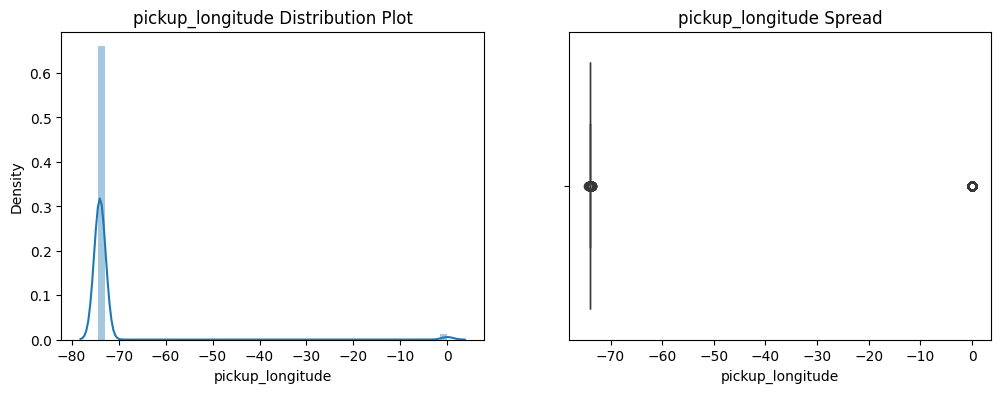

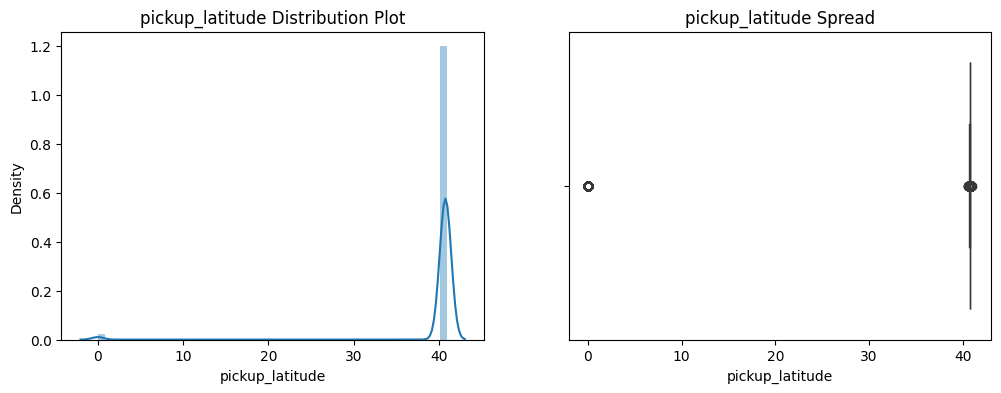

In [136]:
#Histográma y caja de bigotes del precio de los vehículos

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('pickup_longitude Distribution Plot')
sns.distplot(df.pickup_longitude)

plt.subplot(1,2,2)
plt.title('pickup_longitude Spread')
sns.boxplot(x=df.pickup_longitude, palette='nipy_spectral')

plt.show()

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('pickup_latitude Distribution Plot')
sns.distplot(df.pickup_latitude)

plt.subplot(1,2,2)
plt.title('pickup_latitude Spread')
sns.boxplot(x=df.pickup_latitude, palette='nipy_spectral')

plt.show()

In [137]:
df = df[df["pickup_longitude"] != 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29466 entries, 0 to 29999
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tpep_pickup_datetime  29466 non-null  object 
 1   pickup_longitude      29466 non-null  float64
 2   pickup_latitude       29466 non-null  float64
 3   tip_amount            29466 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.1+ MB


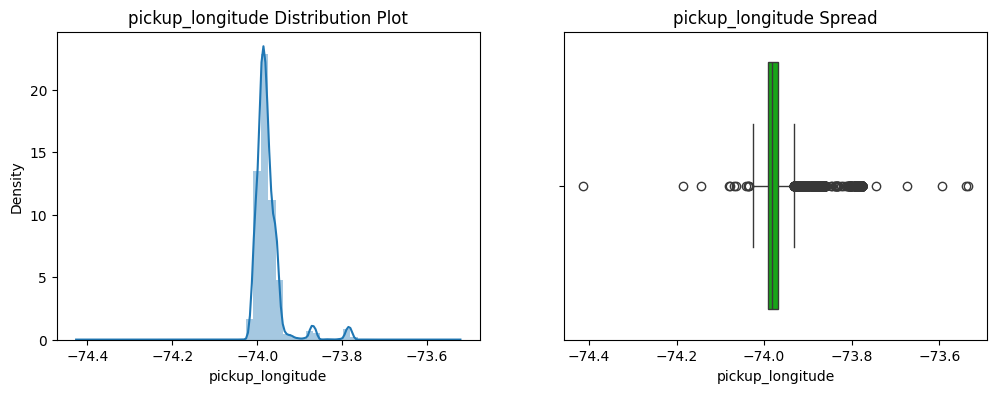

<Axes: title={'center': 'pickup_latitude Spread'}, xlabel='pickup_latitude'>

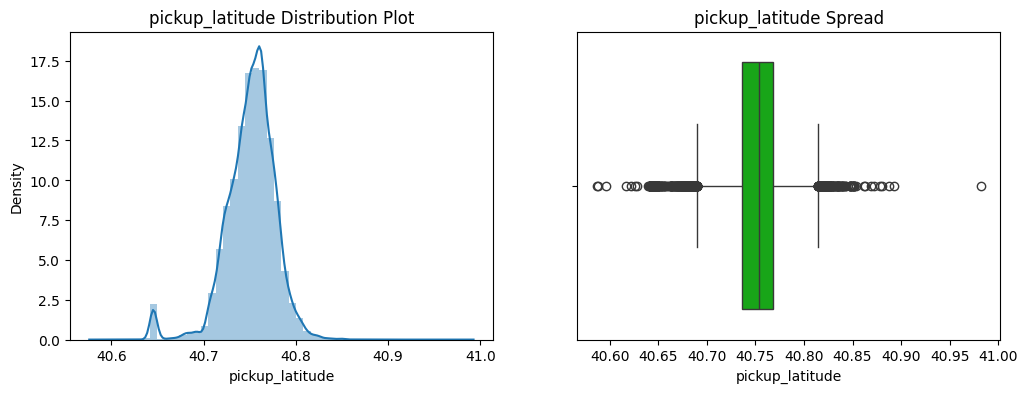

In [141]:
#Histográma y caja de bigotes del precio de los vehículos

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('pickup_longitude Distribution Plot')
sns.distplot(df.pickup_longitude)

plt.subplot(1,2,2)
plt.title('pickup_longitude Spread')
sns.boxplot(x=df.pickup_longitude, palette='nipy_spectral')

plt.show()

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('pickup_latitude Distribution Plot')
sns.distplot(df.pickup_latitude)

plt.subplot(1,2,2)
plt.title('pickup_latitude Spread')
sns.boxplot(x=df.pickup_latitude, palette='nipy_spectral')

<Axes: title={'center': 'tip_amount Spread'}, xlabel='tip_amount'>

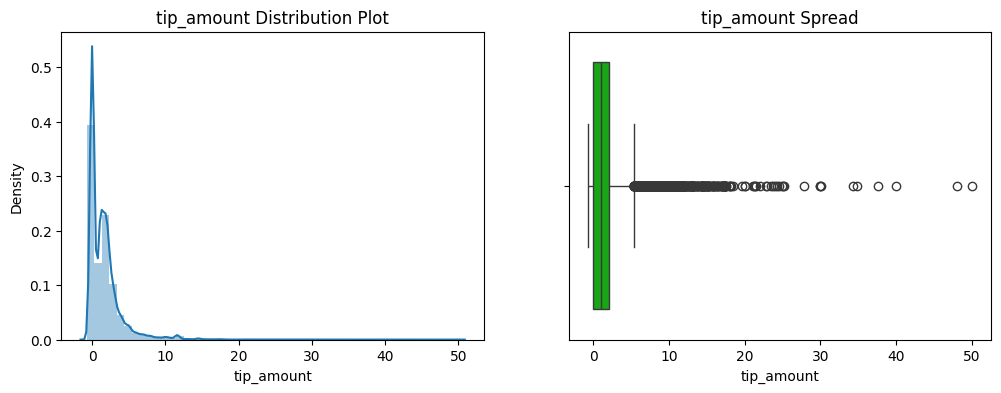

In [143]:

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('tip_amount Distribution Plot')
sns.distplot(df.tip_amount)

plt.subplot(1,2,2)
plt.title('tip_amount Spread')
sns.boxplot(x=df.tip_amount, palette='nipy_spectral')

## Preprocesamiento y normalizacion

In [144]:
# extraer del timestap minuto del dia, dia de la semana, mes del año

# "pickup_longitude","pickup_latitude","tip_amount"
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

df["dia"] = df["tpep_pickup_datetime"].dt.dayofweek
df["mes"] = df["tpep_pickup_datetime"].dt.month
df["minuto"] = df["tpep_pickup_datetime"].dt.minute + (df["tpep_pickup_datetime"].dt.hour*60)

df.drop(columns=['tpep_pickup_datetime'],inplace=True)
df


,pickup_longitude,pickup_latitude,tip_amount,dia,mes,minuto
0,-73.993896,40.750111,3.25,3,1,1145
1,-74.001648,40.724243,2.00,5,1,1233
2,-73.963341,40.802788,0.00,5,1,1233
3,-74.009087,40.713818,0.00,5,1,1233
4,-73.971176,40.762428,0.00,5,1,1233
...,...,...,...,...,...,...
29995,-73.960396,40.770294,2.50,3,3,604
29996,-73.966164,40.794662,1.75,3,3,604
29997,-73.986572,40.761593,1.20,3,3,604
29998,-73.955254,40.770912,0.00,4,3,1093


In [145]:
scaler = MinMaxScaler()

df[df.columns] = scaler.fit_transform(df)


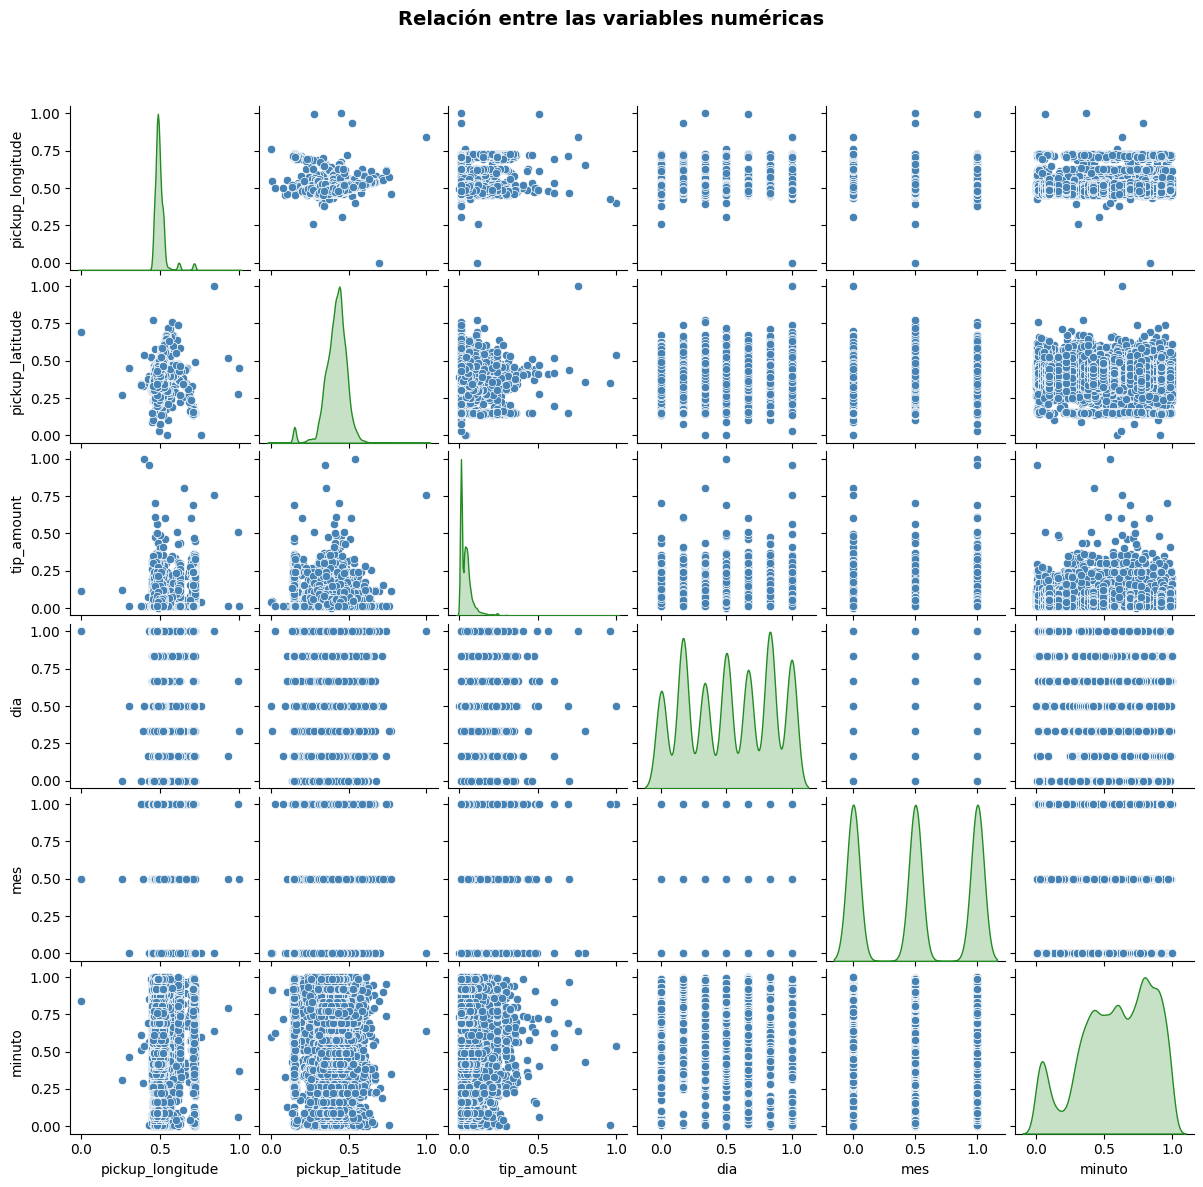

In [146]:
multiple_plot(1, df , df.columns , None, 'scatterplot', 'Relación entre las variables numéricas',30)

In [150]:



tip = df['tip_amount']
features = df[["pickup_longitude","pickup_latitude","dia","mes","minuto"]]
models = [
    # AdaBoostRegressor(n_estimators=20, learning_rate=1, random_state=0),
    # DecisionTreeRegressor(max_depth=5),
    # GradientBoostingRegressor(learning_rate=0.1,n_estimators=20),
    # RandomForestRegressor(max_depth = 5,random_state=0),
    SVR(kernel='sigmoid', C = 1000),
    # SVR(kernel='rbf'    , C = 1000),
    SVR(kernel='linear' , C = 1000),
    SVR(kernel='poly'   , C = 1000, degree = 2),
    SVR(kernel='poly'   , C = 1000, degree = 3)
]

#Cross-validation: 10-folds
CV = 10

cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

a = 0
for model in models:
    model_name = model.__class__.__name__+str(a)
    a += 1
    accuracies = cross_val_score(model, features, tip, cv=CV,n_jobs = -1)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
    print(model_name)
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

SVR0
SVR1


KeyboardInterrupt: 

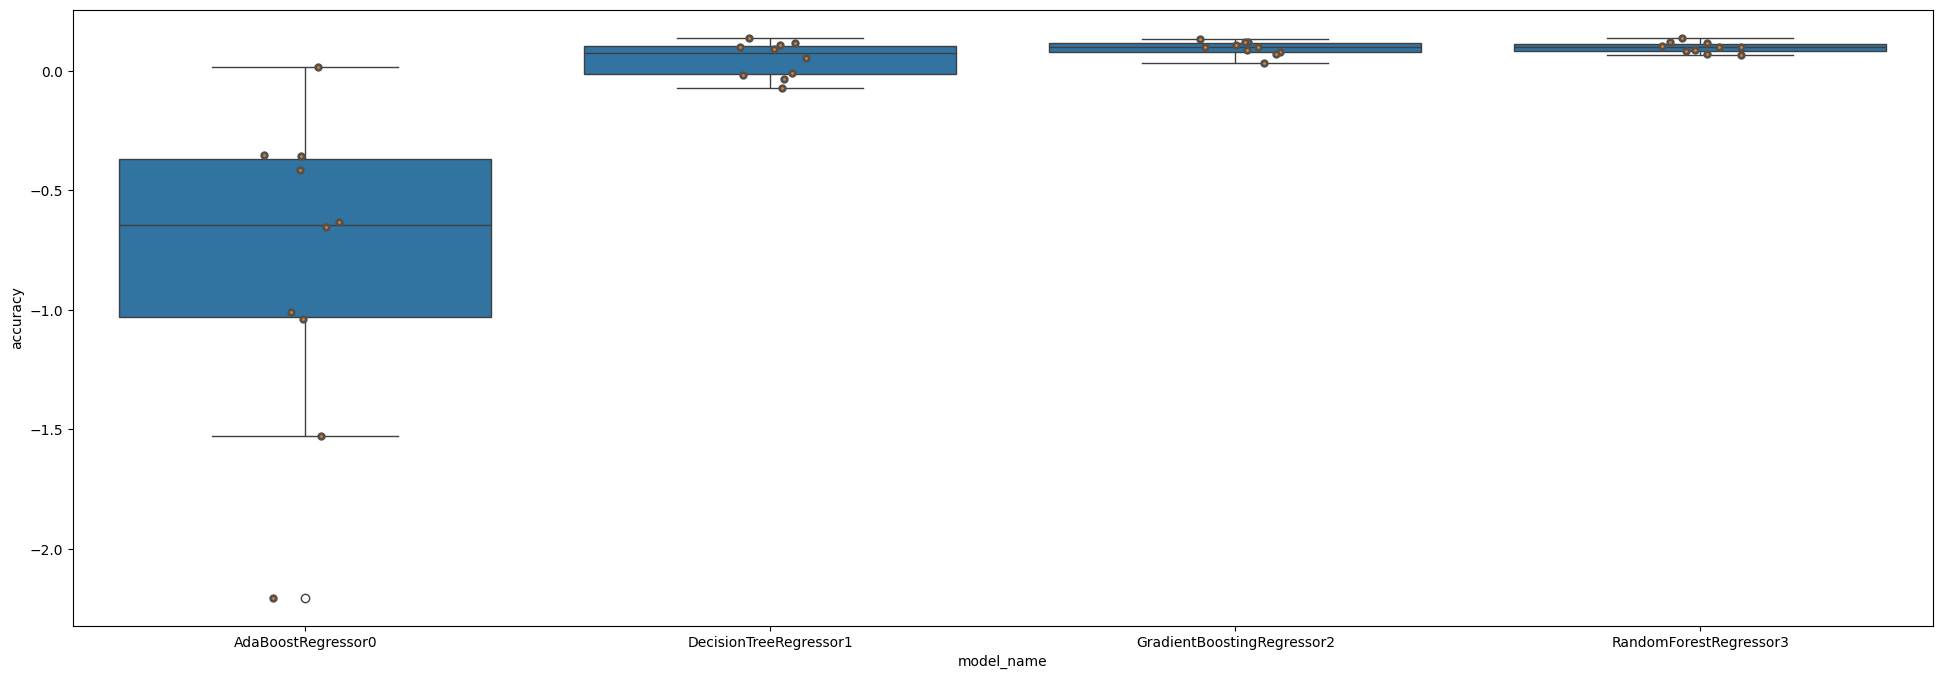

In [149]:
# Gráfica de accuracy de los modelos

figsize=(24,8)

plt.rcParams['figure.figsize'] = figsize

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df,
              size=4, jitter=True, edgecolor="gray", linewidth=2)
plt.show()